In [188]:
library(tidyverse)
library(repr)
library(tidymodels)

In [189]:
heart_disease <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_hungarian <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_switzerland <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_va <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [190]:
# heart_disease <- rbind(heart_disease_cleveland, heart_disease_hungarian, heart_disease_switzerland, heart_disease_va) %>% 
#     mutate(cp = as_factor(cp), sex = as_factor(sex), fbs = as_factor(fbs), thal = as_factor(thal), num = as_factor(num))

In [191]:
heart_disease %>% 
    select(trestbps, chol, num)

trestbps,chol,num
<dbl>,<dbl>,<dbl>
145,233,0
160,286,2
120,229,1
130,250,0
130,204,0
120,236,0
140,268,3
120,354,0
130,254,2


trestbps,chol,num,heart_disease
<dbl>,<dbl>,<dbl>,<lgl>
145,233,0,FALSE
160,286,2,TRUE
120,229,1,TRUE
130,250,0,FALSE
130,204,0,FALSE
120,236,0,FALSE
140,268,3,TRUE
120,354,0,FALSE
130,254,2,TRUE


heart_disease,n
<lgl>,<int>
FALSE,123
TRUE,104


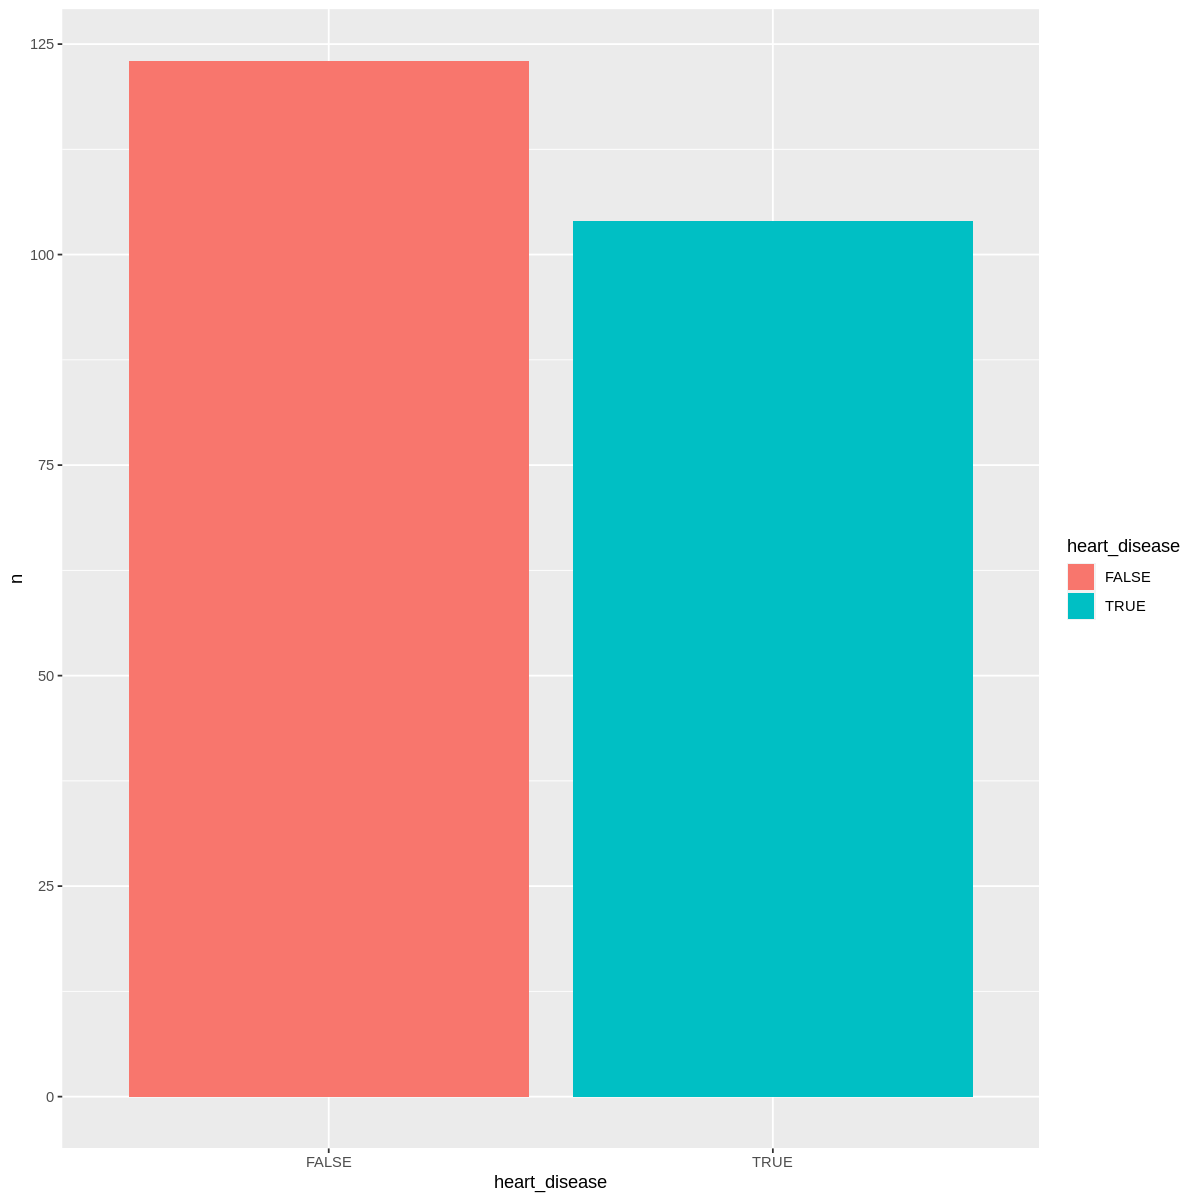

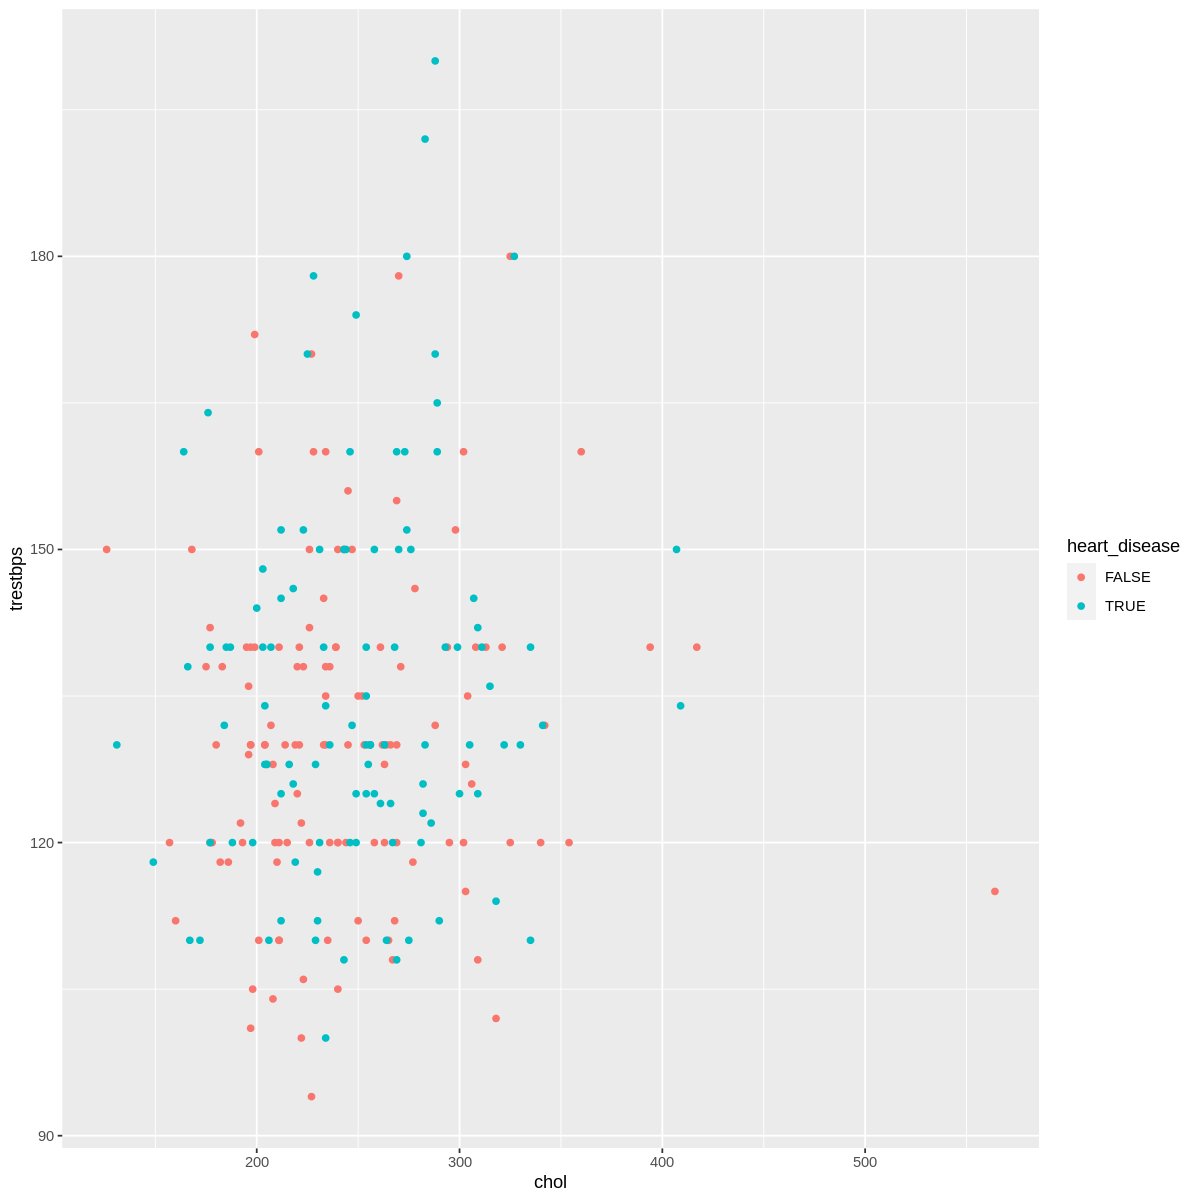

In [196]:
# resting bloood pressure and chol 
heart <- heart %>% 
    mutate(heart_disease = (num != 0)) 
heart 

heart_split <- initial_split(heart, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train_summary <- heart_train %>% 
    group_by(heart_disease) %>% 
    summarize(n = n())

heart_train_summary

heart_train_summary_plot <- ggplot(heart_train_summary, aes(x = heart_disease, y = n, fill = heart_disease)) +
    geom_bar(stat="identity")

heart_train_summary_plot

heart_train_plot <- ggplot(heart_train, aes(x = chol, y = trestbps, color = heart_disease)) +
    geom_point() 

heart_train_plot